# Additional - Frame

![](https://raw.githubusercontent.com/ibcmrocha/public/main/framesimpler.png)

With:
- $EI = 3000$
- $q = 12$
- $EA = \infty$

Solve this problem by simplifying the stiffness matrix first.

In [2]:
import numpy as np
import matplotlib as plt
import matrixmethod as mm
%config InlineBackend.figure_formats = ['svg']

%reload_ext autoreload
%autoreload 2


In [17]:
mm.Node.clear()
mm.Element.clear()

EI = 3000
q = 12 # IF NODE C FOLLOWS NODE D IN THE ORDER, Q IS NEGATIVE! - REFER TO HIS EXAMPLE

nodes = []
nodes.append(mm.Node(0,0)) # A
nodes.append(mm.Node(0,-2)) # B
nodes.append(mm.Node(0,-5)) # C
nodes.append(mm.Node(4,-2)) # D
nodes.append(mm.Node(4,0)) # E

elems = []
elems.append(mm.Element(nodes[0],nodes[1]))
elems.append(mm.Element(nodes[1],nodes[2]))
elems.append(mm.Element(nodes[2],nodes[3]))
elems.append(mm.Element(nodes[3],nodes[4]))
elems.append(mm.Element(nodes[1],nodes[3]))

section = {}
section['EI'] = EI
for elem in elems:
    elem.set_section (section)

elems[2].add_distributed_load([0,q])

con = mm.Constrainer()

con.fix_dof (nodes[0], 0)
con.fix_dof (nodes[0], 1)
con.fix_dof (nodes[4], 0)
con.fix_dof (nodes[4], 1)
con.fix_dof (nodes[1], 0)
con.fix_dof (nodes[2], 0)

print(con)
for elem in elems:
    print(elem)

global_k = np.zeros ((3*len(nodes), 3*len(nodes)))
global_f = np.zeros (3*len(nodes))

for e in elems:
    elmat = e.stiffness()
    idofs = e.global_dofs()
    
    global_k[np.ix_(idofs,idofs)] += elmat

for n in nodes:
    global_f[n.dofs] += n.p

Kff, Ff = con.constrain ( global_k, global_f )
u = np.matmul ( np.linalg.inv(Kff), Ff )
print(u)

print(con.support_reactions(global_k,u,global_f))

This constrainer has constrained the degrees of freedom: [0, 1, 12, 13, 3, 6] with corresponding constrained values: [0, 0, 0, 0, 0, 0])
Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=0,
 - degrees of freedom=[0, 1, 2],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=0,
 - z coordinate=-2,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=-2,
 - degrees of freedom=[3, 4, 5],
 - load vector=[0. 0. 0.]
with node #2:
 This node has:
 - x coordinate=0,
 - z coordinate=-5,
 - degrees of freedom=[6, 7, 8],
 - load vector=[-18.  24. -25.]
Element connecting:
node #1:
 This node has:
 - x coordinate=0,
 - z coordinate=-5,
 - degrees of freedom=[6, 7, 8],
 - load vector=[-18.  24. -25.]
with node #2:
 This node has:
 - x coordinate=4,
 - z coordinate=-2,
 - degrees of freedom=[9, 10, 11],
 - load vector=[-18.  24.  25.]
Element connecting:
node #1:
 T

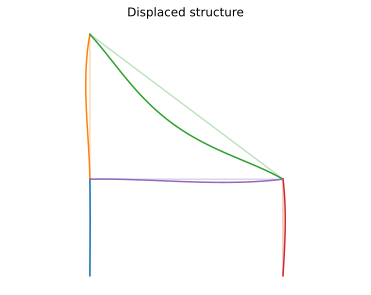

In [18]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_displaced(u_elem,num_points=51,global_c=True,scale=40)

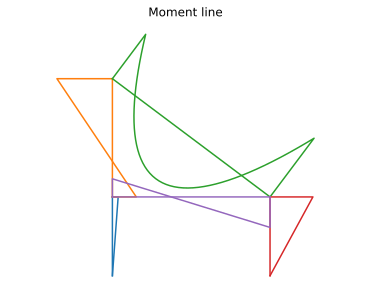

In [19]:
for elem in elems:
    u_elem = con.full_disp(u)[elem.global_dofs()]
    elem.plot_moment_diagram(u_elem,num_points=51,global_c=True,scale=0.08)